In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [21]:
X_train = X_train/ 255
X_test = X_test/ 255

In [43]:
cnn = models.Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [44]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
history = cnn.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5890 - accuracy: 0.4133 - val_loss: 1.2699 - val_accuracy: 0.5409
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2313 - accuracy: 0.5596 - val_loss: 1.1123 - val_accuracy: 0.6064
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0912 - accuracy: 0.6140 - val_loss: 0.9782 - val_accuracy: 0.6538
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9881 - accuracy: 0.6501 - val_loss: 0.9860 - val_accuracy: 0.6603
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9158 - accuracy: 0.6761 - val_loss: 0.8885 - val_accuracy: 0.6851
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8643 - accuracy: 0.6961 - val_loss: 0.8995 - val_accuracy: 0.6870
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8258 - accuracy: 0.7103 - val_loss: 0.8533 - val_ac

In [46]:
def show(X,y,index):
    plt.figure(figsize=(15,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

In [48]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8237 - accuracy: 0.7193


[0.8236926794052124, 0.7192999720573425]

In [50]:
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(y) for y in y_pred]

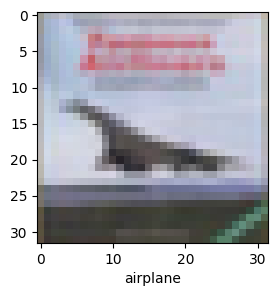

In [52]:
import matplotlib.pyplot as plt
show(X_test,y_test,3)

In [53]:
print(f"Model Prediction is -> {classes[y_pred[3]]}")

Model Prediction is -> airplane


In [54]:
cnn.save("CNN_Model.h5")

In [62]:
import imageio as ie
pic = ie.imread("sharini.png")

C:\Users\Srivatsan\AppData\Local\Temp\ipykernel_10104\4146431620.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = ie.imread("sharini.png")


In [63]:
pic.shape

(24, 32, 4)

In [66]:
pic2 = ie.imread("sid.png")

C:\Users\Srivatsan\AppData\Local\Temp\ipykernel_10104\2678861504.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic2 = ie.imread("sid.png")


In [67]:
pic2.shape

(24, 32, 4)

In [69]:
pic2 = pic2.reshape(1,32,32,3)
prediction = cnn.predict(pic2)
prediction = [np.argmax(p) for p in prediction]

In [70]:
prediction

[9]

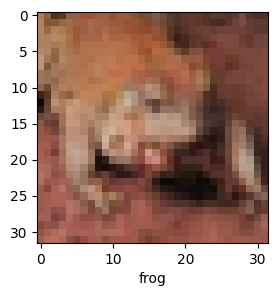

In [71]:
show(X_test,y_test,5)

In [72]:
classes[y_pred[5]]

'frog'